In [30]:
import json
import os
import pandas as pd

path_data = "caselaw/"

main_attributes = json.load(open(path_data + "2301.json", "rb"))

data = {key: [] for key in main_attributes}

for case in os.listdir(path_data):
    file = json.load(open(path_data + case, "rb"))
    for attribute in data.keys():
        data[attribute].append(file[attribute])
    
df = pd.DataFrame(data)
print(f"There are {len(os.listdir(path_data))} total cases")


There are 270 total cases


In [31]:
df.head()

,title,court,courtEng,dateOfDocument,jurisdiction,keywords,summary,summaryEn,language,decisionType,...,nationalCaseLawRecords,caseHistory,ecthrCaseLawRecords,eurovoc,facilexOntology,nationalIdentifier,source,sourceUrl,text,classifiers
0,Wyrok Sądu Najwyższego z dnia 4 lipca 2013 r. ...,Sąd Najwyższy,Supreme Court,2013-07-03T22:00:00Z,"{'label': 'Poland', 'code': 'PL'}","[detention on remand, FW Decision 2002/584 (EAW)]",<p>Stosowanie tymczasowego aresztowania w toku...,<p>The application of detention on remand in t...,"{'label': 'Polish', 'code': 'PL'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[],,III KK 21/13,Supreme Court Database,http://www.sn.pl/orzecznictwo/SitePages/baza_o...,,[Detention conditions]
1,Решение № 850 от 10.03.2022 г. на СРС по ч. н....,Софийски районен съд,Sofia Regional Court,2023-03-09T22:00:00Z,"{'label': 'Bulgaria', 'code': 'BG'}","[Directive 2014/41 (EIO), banking secrecy, exe...","<p class=""ql-align-justify"">Производството е о...","<p class=""ql-align-justify"">The case was initi...","{'label': 'Bulgarian', 'code': 'BG'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[{'label': 'judicial cooperation in criminal m...,,,ЦУБИПСА,https://legalacts.justice.bg/Search/GetActCont...,,[Financial investigations]
2,"Cass. Pen. sez. VI, 28/10/2022, no. 41102",Corte di Cassazione,Court of cassation,2022-10-27T22:00:00Z,"{'label': 'Italy', 'code': 'IT'}","[minor, FW Decision 2002/584 (EAW)]","<p>In tema di mandato di arresto europeo, è on...","<p>With regard to the European arrest warrant,...","{'label': 'Italian', 'code': 'IT'}","{'label': 'Judgment', 'code': 'J'}",...,[],[],[],[],,,,,,[Detention conditions]
3,"TRE, 18.11.2010, ECLI:PT:TRE:2010:176.10.9YREV...",Tribunal da Relação de Évora,High Court of Évora,2010-11-18T00:00:00Z,"{'label': 'Portugal', 'code': 'PT'}","[FW Decision 2002/584 (EAW), Fundamental rights]",,"<p><span style=""color: black;"">A German citize...","{'label': 'Portuguese', 'code': 'PT'}","{'label': 'Judgment', 'code': 'J'}",...,"[{'title': 'STJ, 25-03-2010, Proc. n.º 76/10.2...",[{'title': 'ECLI:PT:STJ:2010:176.10.9YREVR.S1....,[],"[{'label': 'criminal law', 'code': '573'}]",,176/10.9YREVR,Conselho Superior da Magistratura,https://jurisprudencia.csm.org.pt/ecli/ECLI:PT...,,[Necessity and proportionality]
4,Решение № 156 от 17.05.2021 г. на САС по в. ч....,Апелативен съд - София,Appelate Court - Sofia,2021-05-16T21:00:00Z,"{'label': 'Bulgaria', 'code': 'BG'}","[FW Decision 2002/584 (EAW), subsequent surren...","<p class=""ql-align-justify"">\t<span style=""col...","<p class=""ql-align-justify"">\t<span style=""col...","{'label': 'Bulgarian', 'code': 'BG'}","{'label': 'Judgment', 'code': 'J'}",...,[{'title': 'Тълкувателно решение № 2 от 21.10....,[{'title': 'Решение № 480 от 2.12.2019 г. на С...,[],"[{'label': 'European arrest warrant', 'code': ...",,,ЦУБИПСА,https://legalacts.justice.bg/GetActContent/ECL...,,"[Consent to surrender, Mandatory ground for re..."


{'Bulgaria': 81, 'Portugal': 58, 'Italy': 52, 'Poland': 50, 'Germany': 25, 'Netherlands': 2, 'European Union': 2}


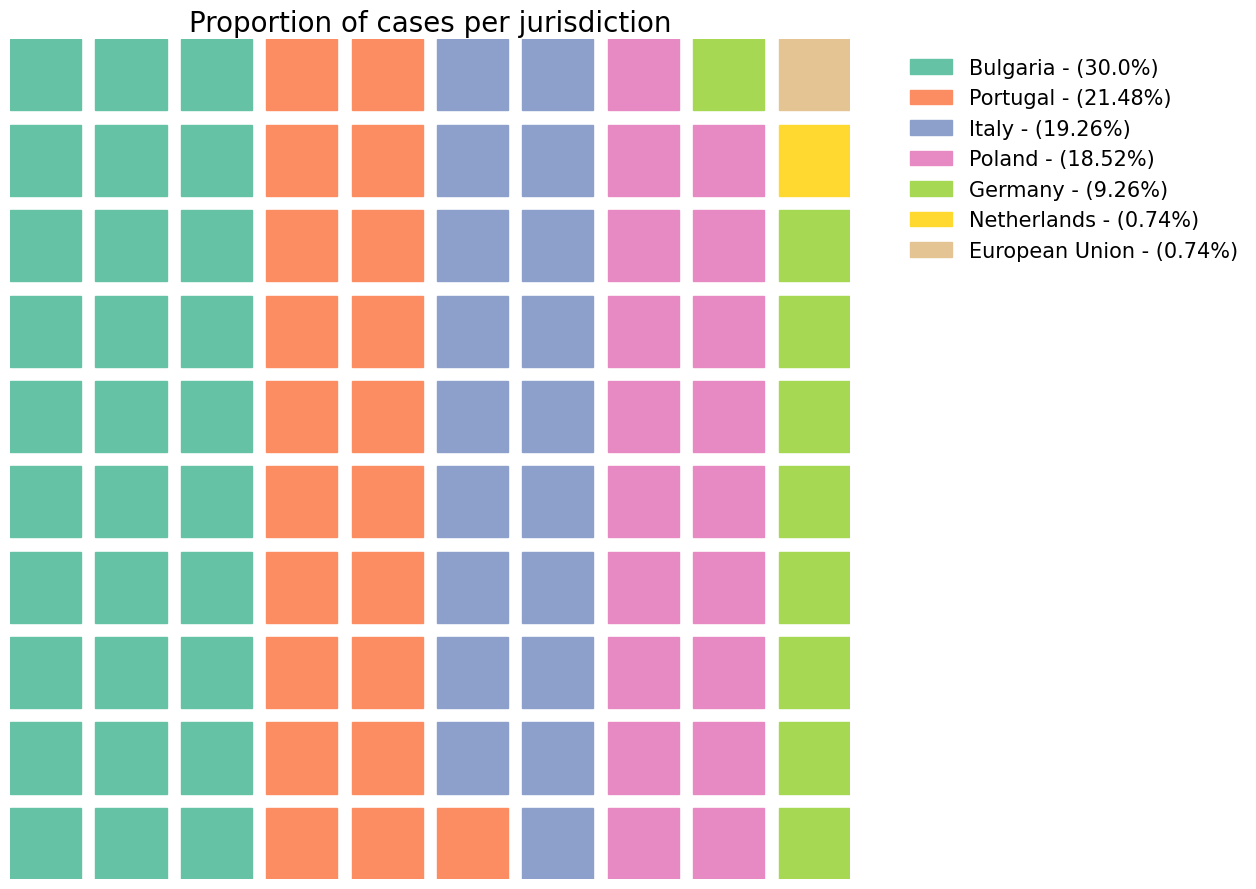

In [32]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

case_count_jurisdiction = df["jurisdiction"].apply(lambda x: x["label"]).value_counts().to_dict()
print(case_count_jurisdiction)

a = plt.figure(figsize = (16,9), FigureClass = Waffle, values = case_count_jurisdiction, rows = 10, columns = 10, legend = {'loc': 'upper left', 'fontsize': 15, 'bbox_to_anchor': (1.05, 1), "frameon": False, 'labels': [f"{k} - ({round(v/len(df) * 100, 2)}%)" for k, v in case_count_jurisdiction.items()]})
plt.title("Proportion of cases per jurisdiction", fontsize = 20)
plt.savefig("waffle_proportion.png", transparent = True)
plt.show()

In [33]:
from collections import defaultdict

freq_classifiers = defaultdict(int)

for classifiers in df["classifiers"]:
    if classifiers == None:
          continue
    for classifier in classifiers:
            freq_classifiers[classifier] += 1

freq_classifiers = dict(sorted(freq_classifiers.items(), key = lambda x: x[1], reverse = True))
list(freq_classifiers.items())[:5]

[('Necessity and proportionality', 25),
 ('Non-mandatory ground for refusal (territoriality issues)', 25),
 ('Video/telephone-conference', 23),
 ('Detention conditions', 21),
 ('Confiscation', 20)]

In [34]:
import numpy as np

not_entire_text = len(df[df["text"].replace("", np.nan).isna() == True])
not_summary = len(df[df["summary"].replace("", np.nan).isna() == True])
not_summary_en = len(df[df["summaryEn"].replace("", np.nan).isna() == True])

print(f"{not_entire_text}/{len(df)} {len(df) - not_entire_text} of cases do not have the entire text body in the dataset")
print(f"{not_summary}/{len(df)}  of cases do not have a summary in the original language")
print(f"{not_summary_en} of cases do not have a summary in English")

249/270 21 of cases do not have the entire text body in the dataset
42/270  of cases do not have a summary in the original language
0 of cases do not have a summary in English


In [35]:
# from which jurisdictions most of the cases are which are missing the original summary
df[df["summary"].replace("", np.nan).isna() == True]["jurisdiction"].apply(lambda x: x["label"]).value_counts()

jurisdiction
Portugal       40
Netherlands     2
Name: count, dtype: int64

In [36]:
df["keywords"].apply(lambda x: len(x) if x != None else x)

# cases with no keywords, and their jurisdiction
print(df[df["keywords"].isnull()]["jurisdiction"].apply(lambda x: x["label"]).value_counts())

jurisdiction
Portugal    7
Name: count, dtype: int64


In [37]:
unique_decision_types = df["decisionType"].apply(lambda x: x["label"] if x != None else "None").unique()
aux = df.copy()
aux["decisionType"] = aux["decisionType"].apply(lambda x: x["label"] if x != None else "None")

# types of decisions per jurisdiction
for decision_type in unique_decision_types:
    print(f"### {decision_type} per jurisdiction ###")
    print(aux[aux["decisionType"] == decision_type]["jurisdiction"].apply(lambda x: x["label"] if x != None else "None").value_counts())
    print()

### Judgment per jurisdiction ###
jurisdiction
Portugal          52
Italy             46
Bulgaria          43
Poland            19
Germany            4
Netherlands        2
European Union     2
Name: count, dtype: int64

### Order per jurisdiction ###
jurisdiction
Bulgaria    37
Germany     20
Italy        1
Name: count, dtype: int64

### Other per jurisdiction ###
jurisdiction
Poland    31
Name: count, dtype: int64

### None per jurisdiction ###
jurisdiction
Portugal    6
Italy       5
Germany     1
Bulgaria    1
Name: count, dtype: int64



In [38]:
# cases that havo no eurovoc attached to them
len(df[df["eurovoc"].str.len() < 1])

129

In [39]:
# counts of EU provisions provided in the dataset
print(df["euProvisions"].apply(lambda x: x[0]["name"] if len(x) > 0 else "Not mentioned").replace("", "Not mentioned").value_counts())
print(df["euProvisions"].apply(lambda x: x[0]["celex"] if len(x) > 0 else "Not mentioned").replace("", "Not mentioned").value_counts())

eu_provisions_not_provided = len(df[df["euProvisions"].apply(lambda x: x[0]["celex"] if len(x) > 0 else "Not mentioned").replace("", "Not mentioned") == "Not mentioned"])

print()
print(f"{eu_provisions_not_provided} of cases have no EU provisions mentioned")

euProvisions
2002/584/JHA : Council Framework Decision of 13 June 2002 on the European arrest warrant and the surrender procedures between Member States - Statements made by certain Member States on the adoption of the Framework Decision                                                               111
Not mentioned                                                                                                                                                                                                                                                                                   76
Directive 2014/41/EU of the European Parliament and of the Council of 3 April 2014 regarding the European Investigation Order in criminal matters                                                                                                                                               38
Council Framework Decision of 13 June 2002 on the European arrest warrant and the surrender procedures between Mem

In [40]:
aux = df.copy()
aux["euProvisions"] = aux["euProvisions"].apply(lambda x: x[0]["name"] if len(x) > 0 else "Not mentioned").replace("", "Not mentioned")
unique_eu_provisions = aux["euProvisions"].unique()

# types of decisions per jurisdiction
for provision in unique_eu_provisions:
    print(f"### {provision} per jurisdiction ###")
    print(aux[aux["euProvisions"] == provision]["jurisdiction"].apply(lambda x: x["label"] if x != None else "None").value_counts())
    print()

### 2002/584/JHA : Council Framework Decision of 13 June 2002 on the European arrest warrant and the surrender procedures between Member States - Statements made by certain Member States on the adoption of the Framework Decision per jurisdiction ###
jurisdiction
Portugal       38
Poland         37
Italy          28
Germany         7
Netherlands     1
Name: count, dtype: int64

### Not mentioned per jurisdiction ###
jurisdiction
Bulgaria          24
Italy             21
Germany           18
Portugal           8
European Union     2
Poland             2
Netherlands        1
Name: count, dtype: int64

### The Schengen acquis - Convention implementing the Schengen Agreement of 14 June 1985 between the Governments of the States of the Benelux Economic Union, the Federal Republic of Germany and the French Republic on the gradual abolition of checks at their common borders per jurisdiction ###
jurisdiction
Bulgaria    1
Name: count, dtype: int64

### Council Framework Decision of 13 June 2002